In [39]:
import csv
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

##### Clean up indexAtoZ file from mass.gov 
https://www.mass.gov/lists/district-court-complaint-manual

In [3]:
# script for removing commas and then inserting commas on column splits of
# initial file where data from pdf was copy and pasted into a csv

# with open("../data/categorizeCharges/input.csv", 'r') as input_csv:
#     csv_reader = csv.reader(input_csv)
    
#     with open("../data/categorizeCharges/output.csv", 'w') as output_csv:
#         csv_writer = csv.writer(output_csv)
        
#         for line in csv_reader:
#             lineStr = ""
#             lineStr = lineStr.join(line)
#             lineStr = lineStr.replace(",", "", 5)
#             firstSpace = lineStr.find(" ")
#             lineStr = lineStr[:firstSpace]+","+lineStr[firstSpace:]
#             if(lineStr.find("§") < 0):
#                 continue
#             secondSpace = lineStr.find(" ", lineStr.find("§")+3)
#             lineStr = lineStr[:secondSpace]+","+lineStr[secondSpace:]
#             thirdSpace = lineStr.find(" ", secondSpace+2)
#             lineStr = lineStr[:thirdSpace]+","+lineStr[thirdSpace:]
#             fourthSpace = lineStr.find(" ", thirdSpace+2)
#             lineStr = lineStr[:fourthSpace]+","+lineStr[fourthSpace:]
#             fifthSpace = lineStr.find(" ", fourthSpace+2)
#             lineStr = lineStr[:fifthSpace]+","+lineStr[fifthSpace:]
#             line[0] = lineStr
#             csv_writer.writerow(line)

#             print(line)

In [4]:
# script for stripping quotes and new line from each row after manual processing of:
# converted_complaint_manual_index_AtoZ.csv

# with open("../data/categorizeCharges/converted_complaint_manual_index_AtoZ.csv", 'r') as input2_csv:
    
#     with open("../data/categorizeCharges/output2.csv", 'w') as output2_csv:
#         for line in input2_csv:
#             print(line)
#             line = line.strip('”"“\n')
#             print(line)
#             output2_csv.write(line+'\n')

In [5]:
#function to find the columns that appear in both lists

# def colIntersect(col1,col2):
#     col2Set = set()
#     colList = []
    
#     for c2 in col2:
#         col2Set.add(c2.lower())
    
#     for c1 in col1:
#         c1lower = c1.lower()
#         if(c1lower in col2Set):
#             colList.append(c1lower)
#     return colList
    
    

##### Renamed output from above to output2.csv and import as indexAtoZ_df 

In [6]:
indexAtoZ_df = pd.read_csv("../data/categorizeCharges/output2.csv", quotechar="'")
indexAtoZ_df.head()
indexAtoZ_df.shape

(5812, 6)

In [7]:
# expOfCodes_df = pd.read_csv("../data/categorizeCharges/explanation_of_codes.csv")
# expOfCodes_df

In [8]:
#get first row of unique offense code 
#this removes duplicate rows where offense is the same but effective dates are different

uniq_offense_df = indexAtoZ_df.drop_duplicates(subset="Offense Code", keep='first', inplace=False)
uniq_offense_df.head()


,Offense Code,Offense,Effective Dates(s),F/M,Stats,Fine
0,265/13A/B,A&B c265 §13A,10/1/43-5/21/02,M+,09,A
2,265/13K/F,A&B ON +60/DISABLED c265 §13K(a½),4/11/05,F,09,A
3,265/13K/A,A&B ON +60/DISABLED WITH INJURY c265 §13K(b),3/17/96,F,09,A
4,265/13K/B,A&B ON +60/DISABLED WITH SERIOUS INJURY c265 §...,3/17/96,F,09,A
5,265/13I/B,A&B ON AMBULANCE PERSONNEL c265 §13I,1/31/90-9/29/10,M+,09,A


In [9]:
# add a OffenseMatch column where Offense column is uppercased and stripped of non alphanumeric characters

uniq_offense_df["OffenseMatch"] = uniq_offense_df["Offense"].str.upper()
uniq_offense_df["OffenseMatch"] = uniq_offense_df["OffenseMatch"].str.replace('\s+|Â|[^0-9a-zA-Z]','', regex=True)
uniq_offense_df.head()

/home/linna/Apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/linna/Apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Offense Code,Offense,Effective Dates(s),F/M,Stats,Fine,OffenseMatch
0,265/13A/B,A&B c265 §13A,10/1/43-5/21/02,M+,09,A,ABC26513A
2,265/13K/F,A&B ON +60/DISABLED c265 §13K(a½),4/11/05,F,09,A,ABON60DISABLEDC26513KA
3,265/13K/A,A&B ON +60/DISABLED WITH INJURY c265 §13K(b),3/17/96,F,09,A,ABON60DISABLEDWITHINJURYC26513KB
4,265/13K/B,A&B ON +60/DISABLED WITH SERIOUS INJURY c265 §...,3/17/96,F,09,A,ABON60DISABLEDWITHSERIOUSINJURYC26513KC
5,265/13I/B,A&B ON AMBULANCE PERSONNEL c265 §13I,1/31/90-9/29/10,M+,09,A,ABONAMBULANCEPERSONNELC26513I


##### middlesex data

##### County level data

In [10]:
# columns of interest that appear in all middlesex, northwest, and suffolk
output_view = ["Offense Date","Charge", "Disposition", "Expungeable", "sex", "murder" ]

In [33]:
middlesex_df = pd.read_csv("../data/cleaned/clean_middlesex.csv", low_memory=False)
middlesex_df.columns
middlesex_df.shape
middlesex_df.head()

,Case Number,Offense Date,Court Location,Charge,Charge/Crime Type,Disposition,Chapter,Section,Paragraph,JuvenileC,years_since_offense,sex,murder,Expungeable,Offenses_per_case,Inc_Expungeable_Attempts_Are,guilty,Incident_Guilty_or_missing
0,14-01-479818,2013-12-30,SOM,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Distribution/Possession with Intent,GUILTY FILED,90,23,D,False,6.7,0,0.0,Yes,2,True,True,True
1,14-01-479826,2013-12-29,LOW,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Possession,NOLLE PROSEQUI,90,23,D,False,6.7,0,0.0,Yes,6,True,False,False
2,14-01-479854,2013-12-31,SOM,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED W/O PREJUDICE,90,23,D,False,6.7,0,0.0,Yes,3,True,False,False
3,14-01-479887,2013-12-28,AYE,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED W/O PREJUDICE,90,23,D,False,6.7,0,0.0,Yes,2,True,False,True
4,14-01-479888,2013-05-19,CON,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED BY FINES,90,23,D,False,7.3,0,0.0,Yes,2,True,False,True


In [60]:
#grouped by charge/crime type and got count of rows with each type using case number column

ms_group_df = middlesex_df[["Case Number","Charge/Crime Type"]].groupby("Charge/Crime Type")
group_count = ms_group_df.count()
group_count.dropna(how="any")
ms_top_10 = group_count.sort_values("Case Number", ascending=False,).head(10)

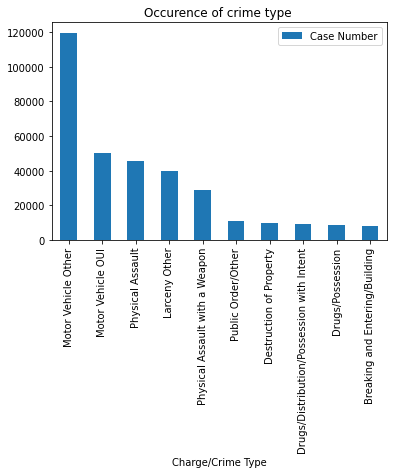

In [63]:
fig = ms_top_10.plot(kind="bar")
plt.title("Top 10 Crime Types")
plt.show()

In [13]:
# add a OffenseMatch column where Offense column is uppercased and stripped of non alphanumeric characters
# this will be used to join with df_unique_offense
middlesex_df["OffenseMatch"] = middlesex_df["Charge"].str.upper()
middlesex_df["OffenseMatch"] = middlesex_df["OffenseMatch"].str.replace('\s+|Â|[^0-9a-zA-Z]','', regex=True)

middlesex_df[["Case Number","OffenseMatch"]]

,Case Number,OffenseMatch
0,14-01-479818,LICENSESUSPENDEDOPMVWITHC9023
1,14-01-479826,LICENSESUSPENDEDOPMVWITHC9023
2,14-01-479854,LICENSESUSPENDEDOPMVWITHC9023
3,14-01-479887,LICENSESUSPENDEDOPMVWITHC9023
4,14-01-479888,LICENSESUSPENDEDOPMVWITHC9023
...,...,...
387526,19-12-661383,LARCBYCHECK
387527,19-12-661396,LARCBYCHECK
387528,19-12-661398,LARCBYCHECK
387529,19-12-661398,LARCBYCHECK


In [14]:
# merged with left join in columns "F/M" and "Offense Code" using "OffenseMatch" column
merged_middlesex_df = middlesex_df.merge(uniq_offense_df[["F/M", "OffenseMatch", "Offense Code"]], how='left', on='OffenseMatch', )

merged_middlesex_df_output = merged_middlesex_df[['Case Number', 'Offense Date', 'Court Location', 'Charge',
       'Charge/Crime Type', 'Disposition', 'Chapter', 'Section', 'Paragraph',
       'JuvenileC', 'years_since_offense', 'sex', 'murder', 'Expungeable',
       'Offenses_per_case', 'Inc_Expungeable_Attempts_Are', 'guilty',
       'Incident_Guilty_or_missing', "F/M", "Offense Code"]]
# merged_middlesex_df_output.head()
# merged_middlesex_df_output.to_csv("../data/categorizeCharges/merged_middlesex.csv")
# merged_middlesex_df[["Case Number", "Charge", "OffenseMatch", "Expungeable", "F/M"]].shape


In [15]:
#number of rows in merged_middlesex_df - number of rows in middlesex_df
#there are more rows after left merging
print(417275-387531)

29744


In [16]:
#number of rows where "F/M" column is NaN
fm_nan_middlesex_df = merged_middlesex_df.loc[pd.isna(merged_middlesex_df["F/M"])]
# fm_nan_middlesex_df.head()
fm_nan_middlesex_df.shape


(60180, 21)

In [17]:
#number of columns where index complaint manual did not contain this offense
nomatch_middlesex_df = merged_middlesex_df.loc[pd.isna(merged_middlesex_df["Offense Code"])]
nomatch_middlesex_df.head()

,Case Number,Offense Date,Court Location,Charge,Charge/Crime Type,Disposition,Chapter,Section,Paragraph,JuvenileC,...,sex,murder,Expungeable,Offenses_per_case,Inc_Expungeable_Attempts_Are,guilty,Incident_Guilty_or_missing,OffenseMatch,F/M,Offense Code
148521,14-01-479832,2013-08-07,AYE,"STOP/YIELD, FAIL TO * c89 Â§9",Motor Vehicle Other,RESPONSIBLE,89,9,NaN,False,...,0,0.0,Yes,2,True,True,True,STOPYIELDFAILTOC899,NaN,NaN
148522,14-01-479966,2013-12-14,LOW,"STOP/YIELD, FAIL TO * c89 Â§9",Motor Vehicle Other,RESPONSIBLE,89,9,NaN,False,...,0,0.0,Yes,2,True,True,True,STOPYIELDFAILTOC899,NaN,NaN
148523,14-01-480004,2013-04-26,LOW,"STOP/YIELD, FAIL TO * c89 Â§9",Motor Vehicle Other,NOT RESPONSIBLE,89,9,NaN,False,...,0,0.0,Yes,2,True,False,False,STOPYIELDFAILTOC899,NaN,NaN
148524,14-01-480032,2013-05-31,LOW,"STOP/YIELD, FAIL TO * c89 Â§9",Motor Vehicle Other,DISMISSED W/O PREJUDICE,89,9,NaN,False,...,0,0.0,Yes,3,True,False,False,STOPYIELDFAILTOC899,NaN,NaN
148525,14-01-480044,2013-12-21,LOW,"STOP/YIELD, FAIL TO * c89 Â§9",Motor Vehicle Other,RESPONSIBLE,89,9,NaN,False,...,0,0.0,Yes,3,True,True,True,STOPYIELDFAILTOC899,NaN,NaN


In [18]:
charge_type_map = merged_middlesex_df[["Charge","OffenseMatch", "Charge/Crime Type"]]
charge_type_map.drop_duplicates(subset="OffenseMatch", keep='first', inplace=True)
charge_type_map.head()

/home/linna/Apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Charge,OffenseMatch,Charge/Crime Type
0,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",LICENSESUSPENDEDOPMVWITHC9023,Drugs/Distribution/Possession with Intent
22492,"DRUG, POSSESS TO DISTRIB CLASS D c94C Â§32C(a)",DRUGPOSSESSTODISTRIBCLASSDC94C32CA,Drugs/Distribution/Possession with Intent
23557,"DRUG, POSSESS CLASS B c94C Â§34",DRUGPOSSESSCLASSBC94C34,Drugs/Possession
26956,SPEEDING * c90 Â§17,SPEEDINGC9017,Drugs/Possession
31017,MARKED LANES VIOLATION * c89 Â§4A,MARKEDLANESVIOLATIONC894A,Drugs/Possession


In [19]:
middlesex_df.columns

Index(['Case Number', 'Offense Date', 'Court Location', 'Charge',
       'Charge/Crime Type', 'Disposition', 'Chapter', 'Section', 'Paragraph',
       'JuvenileC', 'years_since_offense', 'sex', 'murder', 'Expungeable',
       'Offenses_per_case', 'Inc_Expungeable_Attempts_Are', 'guilty',
       'Incident_Guilty_or_missing', 'OffenseMatch'],
      dtype='object')

##### Northwestern data

In [20]:
northwest_df = pd.read_csv("../data/cleaned/clean_northwestern.csv")
northwest_df.head()
northwest_df.columns
# northwest_df.shape

Index(['Person ID', 'Court', 'Offense Date', 'Age at Offense', 'Filed',
       'Status', 'Count', 'Charge', 'Disposition', 'Dispo Date', 'Chapter',
       'Section', 'sex', 'murder', 'Expungeable', 'years_since_offense',
       'Incidents', 'Total Offenses per Person', 'Incidents per Person',
       'Inc_Expungeable_Attempts_Are', 'guilty', 'Incident_Guilty_or_missing'],
      dtype='object')

In [21]:
# add a OffenseMatch column where Offense column is uppercased and stripped of non alphanumeric characters
# this will be used to join with df_unique_offense

northwest_df["OffenseMatch"] = northwest_df["Charge"].str.upper()
northwest_df["OffenseMatch"] = northwest_df["OffenseMatch"].str.replace('\s+|Â|[^0-9a-zA-Z]','', regex=True)

northwest_df[["Person ID","OffenseMatch"]]


,Person ID,OffenseMatch
0,NW-0,ASSAULTTOMURDERC26515
1,NW-0,ASSAULTTOMURDERC26515
2,NW-0,ASSAULTTOMURDERC26515
3,NW-0,ASSAULTTOMURDERC26515
4,NW-0,ARSONOFDWELLINGHOUSEC2661
...,...,...
74159,NW-19752,KIDNAPPINGC26526
74160,NW-19752,ABPREGNANTVICTIM
74161,NW-19752,ASSAULTBATTERYONFAMILYHOUSEHOLDMEMBERC26513MA
74162,NW-19752,ASSAULTWDANGEROUSWEAPONC26515BB


In [22]:
merged_northwest_df = northwest_df.merge(uniq_offense_df[["F/M", "OffenseMatch", "Offense Code"]], how='left', on='OffenseMatch', )
merged_northwest_df[["Person ID", "Charge", "OffenseMatch", "Expungeable", "F/M"]].shape
merged_northwest_df.shape
merged_northwest_df_output = merged_northwest_df[['Person ID', 'Court', 'Offense Date', 'Age at Offense', 'Filed',
       'Status', 'Count', 'Charge', 'Disposition', 'Dispo Date', 'Chapter',
       'Section', 'sex', 'murder', 'Expungeable', 'years_since_offense',
       'Incidents', 'Total Offenses per Person', 'Incidents per Person',
       'Inc_Expungeable_Attempts_Are', 'guilty', 'Incident_Guilty_or_missing', 'F/M', 'Offense Code']]

merged_northwest_df_output.head()
# merged_northwest_df.loc[pd.isna(merged_northwest_df["F/M"])]
# merged_northwest_df_output.to_csv("../data/categorizeCharges/merged_northwest.csv")



,Person ID,Court,Offense Date,Age at Offense,Filed,Status,Count,Charge,Disposition,Dispo Date,...,Expungeable,years_since_offense,Incidents,Total Offenses per Person,Incidents per Person,Inc_Expungeable_Attempts_Are,guilty,Incident_Guilty_or_missing,F/M,Offense Code
0,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,1,ASSAULT TO MURDER c265 Ã‚Â§15,Not Guilty,2016-03-30,...,No,9.0,5,21,5,False,False,False,F,265/15/A
1,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,2,ASSAULT TO MURDER c265 Ã‚Â§15,Not Guilty,2016-03-30,...,No,9.0,5,21,5,False,False,False,F,265/15/A
2,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,3,ASSAULT TO MURDER c265 Ã‚Â§15,Not Guilty,2016-03-30,...,No,9.0,5,21,5,False,False,False,F,265/15/A
3,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,4,ASSAULT TO MURDER c265 Ã‚Â§15,Not Guilty,2016-03-30,...,No,9.0,5,21,5,False,False,False,F,265/15/A
4,NW-0,Franklin Superior Court,2011-09-13,21.0,2014-10-28,Closed,5,ARSON OF DWELLING HOUSE c266 Ã‚Â§1,Not Guilty,2016-03-30,...,Yes,9.0,5,21,5,False,False,False,F,266/1


In [23]:
merged_northwest_df2 = merged_northwest_df.merge(charge_type_map, how='right', on='OffenseMatch', )
merged_northwest_df2.head()

,Person ID,Court,Offense Date,Age at Offense,Filed,Status,Count,Charge_x,Disposition,Dispo Date,...,Total Offenses per Person,Incidents per Person,Inc_Expungeable_Attempts_Are,guilty,Incident_Guilty_or_missing,OffenseMatch,F/M,Offense Code,Charge_y,Charge/Crime Type
0,NW-2,Northampton District Court,2013-12-27,32.0,2014-01-02,Closed,1.0,"LICENSE SUSPENDED, OP MV WITH c90 Ã‚Â§23",Dismissed,2014-04-25,...,5.0,2.0,True,False,True,LICENSESUSPENDEDOPMVWITHC9023,M-,90/23/D,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Distribution/Possession with Intent
1,NW-7,Greenfield District Court,2015-12-03,25.0,2016-01-06,Closed,1.0,"LICENSE SUSPENDED, OP MV WITH c90 Ã‚Â§23",Dismissed at Request of Comm,2016-04-25,...,9.0,3.0,False,False,False,LICENSESUSPENDEDOPMVWITHC9023,M-,90/23/D,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Distribution/Possession with Intent
2,NW-10,Northampton District Court,2013-12-08,70.0,2014-01-02,Closed,1.0,"LICENSE SUSPENDED, OP MV WITH c90 Ã‚Â§23",Dismissed at Request of Comm,2014-02-04,...,1.0,1.0,True,False,False,LICENSESUSPENDEDOPMVWITHC9023,M-,90/23/D,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Distribution/Possession with Intent
3,NW-21,Belchertown District Court,2017-01-15,27.0,2017-01-17,Closed,2.0,"LICENSE SUSPENDED, OP MV WITH c90 Ã‚Â§23",Continued w/o Finding,2017-02-03,...,13.0,6.0,True,False,False,LICENSESUSPENDEDOPMVWITHC9023,M-,90/23/D,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Distribution/Possession with Intent
4,NW-29,Northampton District Court,2013-12-04,48.0,2014-01-02,Warrant,1.0,"LICENSE SUSPENDED, OP MV WITH c90 Ã‚Â§23",NaN,NaN,...,2.0,1.0,True,-1,-1,LICENSESUSPENDEDOPMVWITHC9023,M-,90/23/D,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Distribution/Possession with Intent


##### Suffolk data

In [24]:
suff_df = pd.read_csv("../data/cleaned/clean_suffolk.csv")
suff_df.head()
suff_df.columns

Index(['Person ID', 'Court', 'Offense Date', 'Filed', 'Status', 'Count',
       'Charge', 'Type Crime', 'Code Ucc Ctgry', 'Disposition',
       'Description Disposition Reason', 'Dispo Date', 'Chapter', 'Section',
       'sex', 'murder', 'Expungeable', 'years_since_offense',
       'Total Offenses per Person', 'Incidents per Person', 'ExpAtt', 'sm',
       'guilty', 'Guilty'],
      dtype='object')

In [25]:
# add a OffenseMatch column where Offense column is uppercased and stripped of non alphanumeric characters
# this will be used to join with df_unique_offense

suff_df["OffenseMatch"] = suff_df["Charge"].str.upper()
suff_df["OffenseMatch"] = suff_df["OffenseMatch"].str.replace('\s+|Â|[^A-Za-z0-9]','', regex=True)
suff_df[["Person ID", "OffenseMatch"]]
suff_df.shape

(298438, 25)

In [26]:
merged_suff_df = suff_df.merge(uniq_offense_df[["OffenseMatch","F/M", "Offense Code"]], how="left", on="OffenseMatch")
merged_suff_df.shape

merged_suff_df_output = merged_suff_df[['Person ID', 'Court', 'Offense Date', 'Filed', 'Status', 'Count',
       'Charge', 'Type Crime', 'Code Ucc Ctgry', 'Disposition','Description Disposition Reason', 'Dispo Date', 'Chapter', 'Section',
       'sex', 'murder', 'Expungeable', 'years_since_offense','Total Offenses per Person', 'Incidents per Person', 'ExpAtt', 'sm',
       'guilty', 'Guilty','F/M','Offense Code']]

merged_suff_df_output.head()
# merged_suff_df_output.to_csv("../data/categorizeCharges/merged_suff.csv")

,Person ID,Court,Offense Date,Filed,Status,Count,Charge,Type Crime,Code Ucc Ctgry,Disposition,...,Expungeable,years_since_offense,Total Offenses per Person,Incidents per Person,ExpAtt,sm,guilty,Guilty,F/M,Offense Code
0,SF-0,SUP,2015-11-04,2016-01-01,CL,1,"DRUG, DISTRIBUTE CLASS A, SUBSQ.OFF. c94C Ã‚Â§...",DR,F,Plea,...,Yes,4.8,4,1,True,False,True,NaN,F,94C/32/B
1,SF-0,SUP,2015-11-04,2016-01-01,CL,2,"COCAINE, DISTRIBUTE, SUBSQ.OFF. c94C Ã‚Â§32A(d)",DR,F,Plea,...,Yes,4.8,4,1,True,False,True,NaN,F,94C/32A/B
2,SF-0,SUP,2015-11-04,2016-01-01,CL,3,"DRUG, POSSESS TO DISTRIB CLASS A, SUBSQ. c94C ...",DR,F,Plea,...,Yes,4.8,4,1,True,False,True,NaN,NaN,NaN
3,SF-0,SUP,2015-11-04,2016-01-01,CL,4,"POSSESS TO DISTRIBUTE COCAINE, SUBSEQUENT. c94...",DR,F,Plea,...,Yes,4.8,4,1,True,False,True,NaN,NaN,NaN
4,SF-1,SUP,2014-10-23,2016-01-01,CL,1,A&B ON +60/DISABLED c265 Ã‚Â§13K/F,AS,NaN,Verdict - Jury Trial,...,No,5.9,21,9,False,False,False,NaN,NaN,NaN
